   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


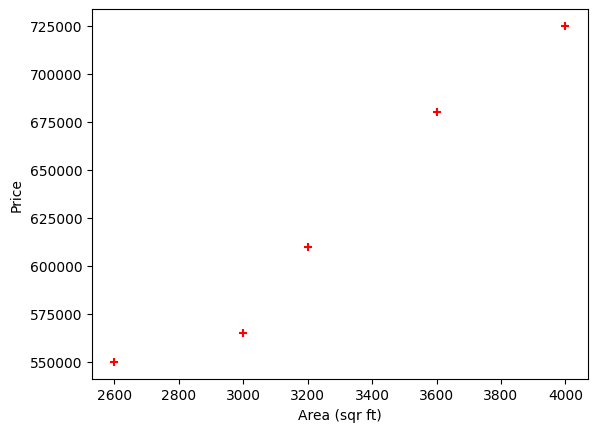

Predicted price for 3300 sq ft: 628715.7534246575
Predicted price for 5000 sq ft: 859554.7945205481
Coefficient (m): 135.78767123287673
Intercept (b): 180616.43835616432
Manually calculated price for 3300 sq ft: 628715.7534246575


In [4]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/housing_area_price.csv')

print(df.head())

# Plot the data
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price')
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.show()

# Prepare data
X = df[['area']]   # Independent variable (must be 2D)
y = df['price']    # Dependent variable

# Create and train model
reg = LinearRegression()
reg.fit(X, y)

# Predict price for 3300 sq ft
price_3300 = reg.predict(pd.DataFrame({'area': [3300]}))
print("Predicted price for 3300 sq ft:", price_3300[0])

# Predict price for 5000 sq ft
price_5000 = reg.predict(pd.DataFrame({'area': [5000]}))
print("Predicted price for 5000 sq ft:", price_5000[0])

# Print coefficient and intercept
print("Coefficient (m):", reg.coef_[0])
print("Intercept (b):", reg.intercept_)

# Verify using equation Y = mX + b
calculated_price = reg.coef_[0] * 3300 + reg.intercept_
print("Manually calculated price for 3300 sq ft:", calculated_price)

In [8]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/homeprices_Multiple_LR.csv')

print(df.head())
# Fill missing bedroom values with median
median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)

print("\nDataset after filling NA values:")
print(df)

# Model Training

X = df[['area', 'bedrooms', 'age']]   # Independent variables
y = df['price']                       # Dependent variable

reg = LinearRegression()
reg.fit(X, y)

# Print coefficients and intercept
print("\nCoefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

# Prediction

# Predict price for: 3000 sq ft, 3 bedrooms, 40 years old
input_data = pd.DataFrame({
    'area': [3000],
    'bedrooms': [3],
    'age': [40]
})

predicted_price = reg.predict(input_data)

print("\nPredicted price:", predicted_price[0])

# Manual Verification (Y = m1x1 + m2x2 + m3x3 + b)

manual_price = (
    reg.coef_[0] * 3000 +
    reg.coef_[1] * 3 +
    reg.coef_[2] * 40 +
    reg.intercept_
)

print("Manually calculated price:", manual_price)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000

Dataset after filling NA values:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
Intercept: 221323.00186540396

Predicted price: 498408.2515803067
Manually calculated price: 498408.2515803067


   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Predicted per capita income in 2020: 41288.69409441762


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


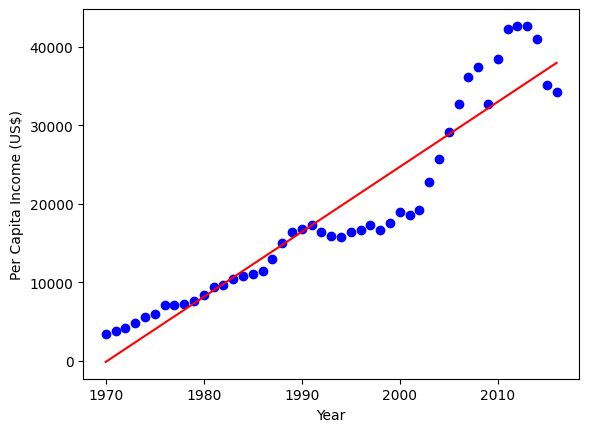

In [11]:
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("canada_per_capita_income.csv")

print(df.head())

# Prepare data
X = df[['year']]
y = df['per capita income (US$)']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict income for 2020
predicted_income = model.predict([[2020]])
print("Predicted per capita income in 2020:", predicted_income[0])

# Plot graph
plt.scatter(df['year'], df['per capita income (US$)'], color='blue')
plt.plot(df['year'], model.predict(X), color='red')
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.show()

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Predicted Salary for 12 years experience: 139049.6749539778


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


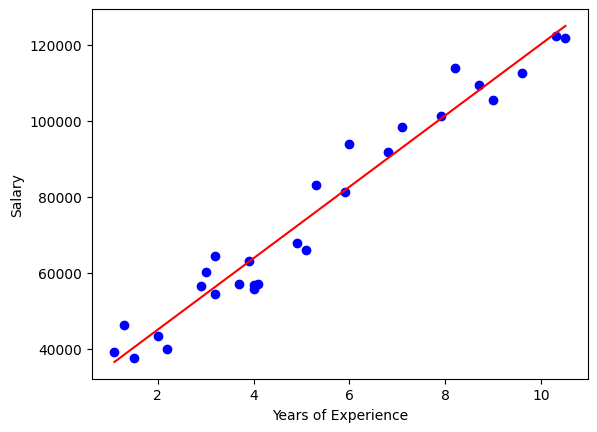

In [12]:
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("salary.csv")

print(df.head())

# Remove missing values
df = df.dropna()

# Prepare data
X = df[['YearsExperience']]
y = df['Salary']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 12 years experience
predicted_salary = model.predict([[12]])
print("Predicted Salary for 12 years experience:", predicted_salary[0])

# Plot graph
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.plot(df['YearsExperience'], model.predict(X), color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [14]:
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("hiring.csv")

# Convert text experience to numbers
word_to_num = {
    'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,
    'six':6,'seven':7,'eight':8,'nine':9,'ten':10,
    'eleven':11,'twelve':12
}

df['experience'] = df['experience'].replace(word_to_num)
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df['experience'] = df['experience'].fillna(0)
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(
    df['test_score(out of 10)'].median()
)

X = df[['experience','test_score(out of 10)','interview_score(out of 10)']]
y = df['salary($)']

model = LinearRegression()
model.fit(X, y)

print("Salary for (2,9,6):", model.predict([[2,9,6]])[0])
print("Salary for (12,10,10):", model.predict([[12,10,10]])[0])

Salary for (2,9,6): 53205.96797671033
Salary for (12,10,10): 92002.18340611353


/tmp/ipython-input-137/3351042536.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience'] = df['experience'].replace(word_to_num)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("1000_Companies.csv")

df = pd.get_dummies(df, columns=['State'], drop_first=True)

X = df.drop('Profit', axis=1)
y = df['Profit']

model = LinearRegression()
model.fit(X, y)

# Florida = 1, New York = 0 (California is base)
input_data = [[91694.48, 515841.3, 11931.24, 1, 0]]

print("Predicted Profit:", model.predict(input_data)[0])

Predicted Profit: 510570.9926108309


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
